EDA approach was learnt from https://github.com/Suji04/ML_from_Scratch/blob/master/naive%20bayes.ipynb

In [656]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [657]:
data = pd.read_csv('Breast_cancer_data.csv')
data.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


array([[<Axes: title={'center': 'mean_radius'}>,
        <Axes: title={'center': 'mean_texture'}>],
       [<Axes: title={'center': 'mean_perimeter'}>,
        <Axes: title={'center': 'mean_area'}>],
       [<Axes: title={'center': 'mean_smoothness'}>,
        <Axes: title={'center': 'diagnosis'}>]], dtype=object)

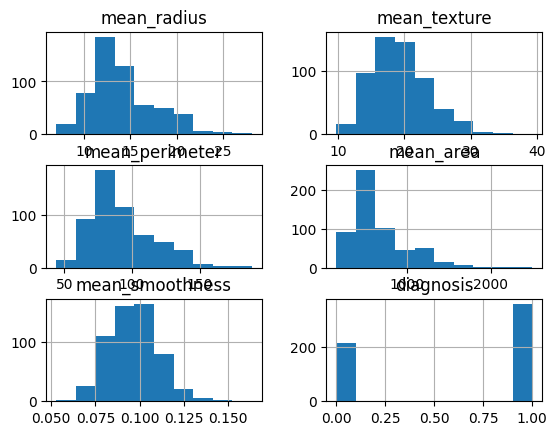

In [658]:
data.hist()

since naive bayes assumes that all the features that are being considered are independent of each other, we only select features that have minimal correlation

for this we use pandas corr function with pearson method, correlation is defined in the range [-1, 1]


heatmap function is used to better display the relation between features

<Axes: >

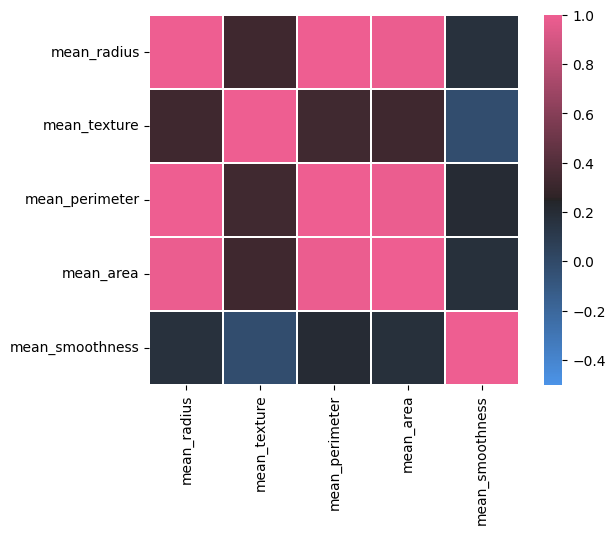

In [659]:
correlation = data.iloc[:, :-1].corr(method="pearson")
cmap = sns.diverging_palette(250, 354, 80, 60, center="dark", as_cmap=True)
sns.heatmap(correlation, vmax=1, vmin=-0.5, cmap=cmap, square=True, linewidths=.2)

In [660]:
data = data[['mean_radius', 'mean_texture', 'mean_smoothness', 'diagnosis']]
data.head(10)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


since our features are continuous values we convert it by assigning bin values using pd.cut function

In [661]:
data["cat_mean_radius"] = pd.cut(data["mean_radius"].values, bins = 3, labels = [0,1,2])
data["cat_mean_texture"] = pd.cut(data["mean_texture"].values, bins = 3, labels = [0,1,2])
data["cat_mean_smoothness"] = pd.cut(data["mean_smoothness"].values, bins = 3, labels = [0,1,2])

data = data.drop(columns=["mean_radius", "mean_texture", "mean_smoothness"])
data = data[["cat_mean_radius",	"cat_mean_texture",	"cat_mean_smoothness", "diagnosis"]]
data.head(10)

,cat_mean_radius,cat_mean_texture,cat_mean_smoothness,diagnosis
0,1,0,1,0
1,1,0,0,0
2,1,1,1,0
3,0,1,2,0
4,1,0,1,0
5,0,0,2,0
6,1,1,1,0
7,0,1,1,0
8,0,1,2,0
9,0,1,1,0


helper function to get all features (column labels except for the last column because last column is the target/class)

In [670]:
def _getFeatures(df):
    return list(df.columns)[:-1]

_getFeatures(data)

['cat_mean_radius', 'cat_mean_texture', 'cat_mean_smoothness']

get the target variable/class label
0 = benign
1 = malignant

In [672]:
def _getClassLabels(df, Y):
    return sorted(list(df[Y].unique()))

_getClassLabels(data, 'diagnosis')

[0, 1]

# Bayes equation

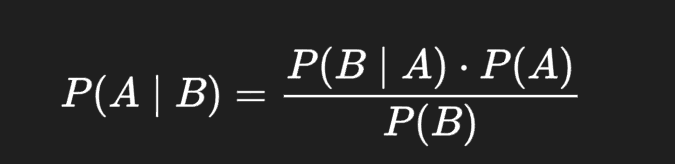

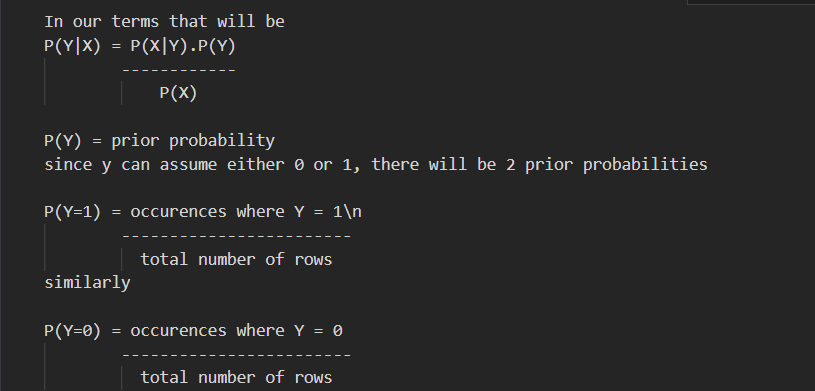

In [664]:
def calculate_prior(df, Y):
    labels = _getClassLabels(df, Y)
    prior = []
    
    for i in labels:
        prior.append(len(df[df[Y] == i]) / len(df))
    return prior

calculate_prior(data, 'diagnosis')

[0.37258347978910367, 0.6274165202108963]

In [665]:
# def calculate_likelihood_categorical(df, feature_name, feature_value, Y, label):
#     df = df[df[Y] == label]
    
#     probability_x_given_y = len(df[df[feature_name] == feature_value]) / len(df)
#     return probability_x_given_y

def calculate_likelihood_categorical(df, feature_name, feature_value, Y, label, smoothing=1):
    df = df[df[Y] == label]
    feature_counts = df[feature_name].value_counts()
    total_count = len(df)
    
    # Apply Laplace smoothing
    probability_x_given_y = (feature_counts.get(feature_value, 0) + smoothing) / (total_count + smoothing * len(feature_counts))
    return probability_x_given_y

In [666]:
def naive_bayes_categorical(dftrain, x, target):
    features = _getFeatures(dftrain)
    prior = calculate_prior(dftrain, target)
    labels = _getClassLabels(dftrain, target)
    
    predictions = []
    for j in range(len(labels)):
        likelihood = 1
        for k in range(len(features)):
            likelihood *= calculate_likelihood_categorical(
                dftrain,
                feature_name=features[k],
                feature_value=x.iloc[k],
                Y=target,
                label=labels[j]
            )
        
        post_prob = likelihood * prior[j]
        predictions.append(post_prob)
    
    # print(f"Predicted probabilities: {predictions}")  # Debugging line
    #
    return np.argmax(predictions)

In [667]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
import sklearn

train, test = train_test_split(data, test_size=.2, random_state=41)


xtrain = pd.DataFrame(train)
xtest = pd.DataFrame(test)
ytrain = train.iloc[:, -1].values
ytest = test.iloc[:, -1].values


In [668]:
from sklearn.metrics import confusion_matrix, f1_score

predictions = []


for i in range(len(xtest)):
    x = xtest.iloc[i]
    
    pred = naive_bayes_categorical(xtrain, x, 'diagnosis')
    predictions.append(pred)
    
    # print(f"actual = {ytest[i]} predicted = {pred}")
    
print(confusion_matrix(predictions, ytest))
print(f1_score(predictions, ytest))

0.9517241379310345
